In [41]:
# Qiskit 라이브러리 불러오기
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise
from qiskit.visualization import plot_histogram

# 기타 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import time

# Bell Test on IBMQ

In [42]:
'''
# Quantum Experience에서 양자 컴퓨터를 불러오기
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
lima = provider.get_backend('ibmq_lima')
'''

# 양자 시뮬레이터 로드
simulator = QasmSimulator()

ibmqfactory.load_account:WARNING:2021-11-26 14:41:26,637: Credentials are already in use. The existing account in the session will be replaced.


In [43]:
# 벨의 부등식 시험을 위한 양자 회로 제작하기

circuits = []
theta_arr = np.linspace(0,pi*2,20)

for theta in theta_arr:
    # A, B 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

    # A, C 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(-theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

    # B, C 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(theta, 0)
    circuit.ry(-theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

60


In [44]:
# 양자 시뮬레이터로 시험하기
result_ideal = simulator.run(circuits).result()

In [43]:
'''
# Quantum Experience에서 양자 컴퓨터로 시험하기
transpiled_circuits = transpile(circuits, lima)
job_real = lima.run(transpiled_circuits, shots=1024)
job_monitor(job_real)
result_real = job_real.result()
'''

Job Status: job has successfully run


In [46]:
# 양자 시뮬레이터 계산 결과를 확률로 반환하는 함수
def getProbability(result):
    res = []
    for i in range(20):
        temp = 0
        for j in range(i*3, i*3+3):
            temp += result[j].get('11', 0)
            temp += result[j].get('00', 0)
        temp /= 3*1024
        res.append(temp)

    return res

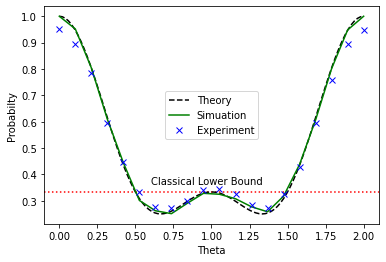

In [52]:
# 숨은 변수 이론에 따른 확률의 하한
plt.axhline(y=1/3, color='r', linestyle=':')
plt.annotate("Classical Lower Bound", (1-0.4, 1/3+0.03))

# 양자역학에 따른 이론적 확률 그래프
theta_arr = np.linspace(0, 2*pi, 100)
plt.plot(theta_arr/pi, (np.cos(theta_arr/2)**2*2+np.cos(theta_arr)**2)/3, '--k', label = "Theory")

# 시뮬레이션에 따른 확률 그래프
theta_arr = np.linspace(0, 2*pi, 20)
plt.plot(theta_arr/pi, getProbability(result_ideal.get_counts()), 'g', label = "Simuation")

'''
# 양자 컴퓨터로 수행한 롹률 그래프
plt.plot(theta_arr/pi, getProbability(result_real.get_counts()), 'xb', label = "Experiment")
'''

plt.legend(loc="center")
plt.savefig("MyBellTest.svg")
plt.ylabel("Probabilty")
plt.xlabel("Theta")
plt.show()

# CHSH test on IBMQ

In [55]:
circuits = []
theta_arr = np.linspace(0,pi*2,20)

for theta in theta_arr:
    # A, B 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

    # A', B 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(2*theta, 0)
    circuit.ry(theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

    # A, B' 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(3*theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

    # A', B' 측정 양자 회로
    circuit = QuantumCircuit(2, 2)

    circuit.h(0)
    circuit.cx(0, 1)

    circuit.ry(2*theta, 0)
    circuit.ry(3*theta, 1)

    circuit.measure([0,1], [0, 1])

    circuits.append(circuit)

80


In [56]:
# 양자 시뮬레이터로 시험하기
result_ideal = simulator.run(circuits, shots=1024).result()

In [57]:
'''
# Quantum Experience에서 양자 컴퓨터로 시험하기
transpiled_circuits = transpile(circuits, lima)
job_real = lima.run(transpiled_circuits, shots=1024)
job_monitor(job_real)
result_real = job_real.result()
'''

In [58]:

# 양자 시뮬레이터 계산 결과를 상관계수로 반환하는 함수
def getCorrelation(result):
    temp = 0
    temp += result.get('11', 0)
    temp += result.get('00', 0)
    temp -= result.get('01', 0)
    temp -= result.get('10', 0)
    return temp/1024


# 양자 시뮬레이터 계산 결과를 S로 반환하는 함수
def getS(result):
    res = []
    for i in range(20):
        temp = 0
        temp += getCorrelation(result[i*4])
        temp += getCorrelation(result[i*4+1])
        temp -= getCorrelation(result[i*4+2])
        temp += getCorrelation(result[i*4+3])
        res.append(temp)

    return res

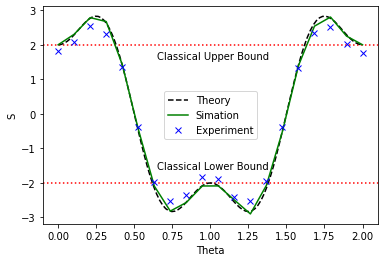

In [65]:
# 숨은 변수 이론에 따른 S의 상한과 하한
plt.axhline(y=2, color='r', linestyle=':')
plt.annotate("Classical Upper Bound", (1-.35, 2-0.4))
plt.axhline(y=-2, color='r', linestyle=':')
plt.annotate("Classical Lower Bound", (1-.35, -2+0.4))

# 양자역학에 따른 이론적 확률 그래프
theta_arr = np.linspace(0, 2*pi, 100)
f = lambda x : np.cos(x) - np.cos(3*x) + np.cos(-x) + np.cos(x)
plt.plot(theta_arr/pi, f(theta_arr), '--k', label = "Theory")

# 시뮬레이션에 따른 확률 그래프
theta_arr = np.linspace(0, 2*pi, 20)
Cress = getS(result_ideal.get_counts())
plt.plot(theta_arr/pi, Cress, 'g', label = "Simation")


'''
# 양자 컴퓨터로 수행한 롹률 그래프
plt.plot(theta_arr/pi, getS(result_real.get_counts()), 'xb', label = "Experiment")
'''

plt.legend(loc="center")
plt.savefig("MyCHSHTest.svg")
plt.ylabel("S")
plt.xlabel("Theta")
plt.show()